# Surrogating a function with a machine learning estimator

System dynamics generally represents the relationships between model elements as either analytical equations, or lookup tables. However, in some situations we may be presented with relationships that are not well estimated by equations, but involve more than a single input leading to a single output. When confrontied with this situation, other paradigms 

<img src="../../models/Manufacturing_Defects/Defects.png" alt="Simple defects model" style="width: 400px;"/>

In [1]:
%pylab inline
import pysd
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
model = pysd.read_vensim('../../models/Manufacturing_Defects/Defects.mdl')

In [3]:
data = pd.read_csv('../../data/Defects_Synthetic/Manufacturing_Defects_Synthetic_Data.csv')
data.head()

,Unnamed: 0,Workday,Time per Task,Defect Rate
0,0,0.357563,0.036497,0.066678
1,1,0.300276,0.035329,0.063891
2,2,0.301040,0.054992,0.049828
3,3,0.290333,0.046289,0.046932
4,4,0.384306,0.050605,0.064480


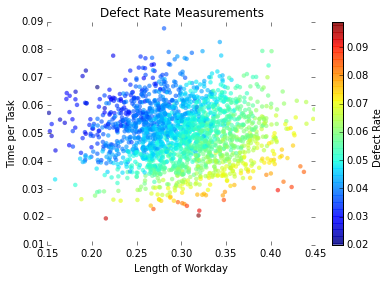

In [4]:
plt.scatter(data['Workday'], data['Time per Task'], c=data['Defect Rate'], linewidth=0, alpha=.6)
plt.ylabel('Time per Task')
plt.xlabel('Length of Workday')
plt.xlim(0.15, .45)
plt.ylim(.01, .09)
plt.box('off')
plt.colorbar()
plt.title('Defect Rate Measurements')
plt.figtext(.88, .5, 'Defect Rate', rotation=90, verticalalignment='center');

In [5]:
from sklearn.svm import SVR

Factors = data[['Workday','Time per Task']].values
Outcome = data['Defect Rate'].values
regression = SVR()
regression.fit(Factors, Outcome)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
def new_defect_function():
    """ Replaces the original defects equation with a regression model"""
    workday = model.components.length_of_workday()
    time_per_task = model.components.time_allocated_per_unit()
    return regression.predict([workday, time_per_task])[0]

model.components.defect_rate = new_defect_function

In [7]:
model.components.defect_rate()

0.059499757838150001

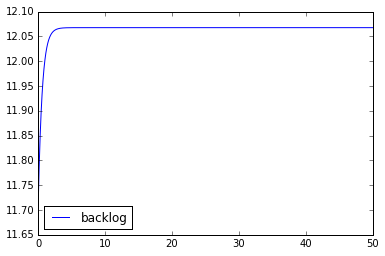

In [8]:
model.run().plot();